Thank you for opening this script!

I have made all efforts to document each and every step involved in the prediction process so that this notebook acts as a good starting point for new Kagglers and new machine learning enthusiasts.

Please **upvote** this kernel so that it reaches the top of the chart and is easily locatable by new users. Your comments on how we can improve this kernel is welcome. Thanks.

My other exploratory studies can be accessed here :
https://www.kaggle.com/sharmasanthosh/kernels
***
## Data statistics
* Shape
* Peek
* Description
* Skew

## Transformation
* Correction of skew

## Data Interaction
* Correlation
* Scatter plot

## Data Visualization
* Box and density plots
* Grouping of one hot encoded attributes

## Data Preparation
* One hot encoding of categorical data
* Test-train split

## Evaluation, prediction, and analysis
* Linear Regression (Linear algo)
* Ridge Regression (Linear algo)
* LASSO Linear Regression (Linear algo)
* Elastic Net Regression (Linear algo)
* KNN (non-linear algo)
* CART (non-linear algo)
* SVM (Non-linear algo)
* Bagged Decision Trees (Bagging)
* Random Forest (Bagging)
* Extra Trees (Bagging)
* AdaBoost (Boosting)
* Stochastic Gradient Boosting (Boosting)
* MLP (Deep Learning)
* XGBoost

## Make Predictions
***

## Load raw data:

Information about all the attributes can be found here:

https://www.kaggle.com/c/allstate-claims-severity/data

Learning: 
We need to predict the 'loss' based on the other attributes. Hence, this is a regression problem.

In [1]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

# Read raw data from the file

import pandas #provides data structures to quickly analyze data
#Since this code runs on Kaggle server, data can be accessed directly in the 'input' folder
#Read the train dataset
dataset = pandas.read_csv("../input/train.csv") 

#Read test dataset
dataset_test = pandas.read_csv("../input/test.csv")
#Save the id's for submission file
ID = dataset_test['id']
#Drop unnecessary columns
dataset_test.drop('id',axis=1,inplace=True)

#Print all rows and columns. Dont hide any
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)

#Display the first five rows to get a feel of the data
print(dataset.head(5))

#Learning : cat1 to cat116 contain alphabets

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13  \
0   1    A    B    A    B    A    A    A    A    B     A     B     A     A   
1   2    A    B    A    A    A    A    A    A    B     B     A     A     A   
2   5    A    B    A    A    B    A    A    A    B     B     B     B     B   
3  10    B    B    A    B    A    A    A    A    B     A     A     A     A   
4  11    A    B    A    B    A    A    A    A    B     B     A     B     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25  \
0     A     A     A     A     A     A     A     A     A     B     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     B     A     A   
4     A     A     A     A     A     A     A     A     A     B     A     A   

  cat26 cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 cat36 

## Data statistics
* Shape

In [2]:
# Size of the dataframe

print(dataset.shape)

# We can see that there are 188318 instances having 132 attributes

#Drop the first column 'id' since it just has serial numbers. Not useful in the prediction process.
dataset = dataset.iloc[:,1:]

#Learning : Data is loaded successfully as dimensions match the data description

(188318, 132)


## Data statistics
* Description

In [3]:
# Statistical description

print(dataset.describe())

# Learning :
# No attribute in continuous columns is missing as count is 188318 for all, all rows can be used
# No negative values are present. Tests such as chi2 can be used
# Statistics not displayed for categorical data

               cont1          cont2          cont3          cont4  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.493861       0.507188       0.498918       0.491812   
std         0.187640       0.207202       0.202105       0.211292   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.346090       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.623912       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487428       0.490945       0.484970       0.486437   
std         0.209027       0.205273       0.178450       0.199370   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281143       0.3361

## Data statistics
* Skew

In [4]:
# Skewness of the distribution

print(dataset.skew())

# Values close to 0 show less ske
# loss shows the highest skew. Let us visualize it

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


## Data Visualization
* Box and density plots

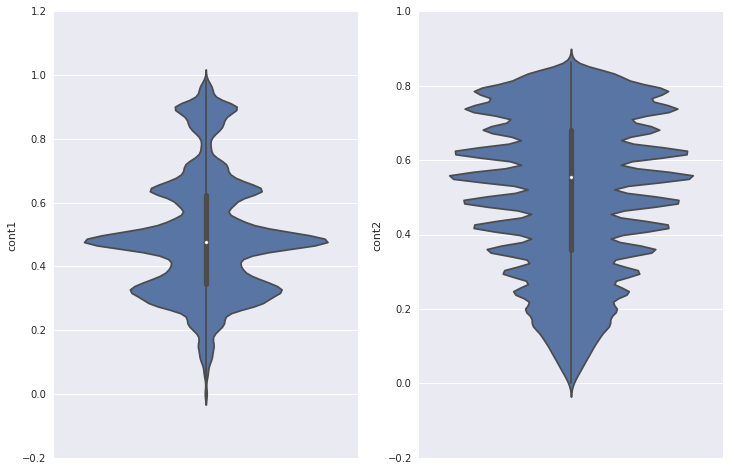

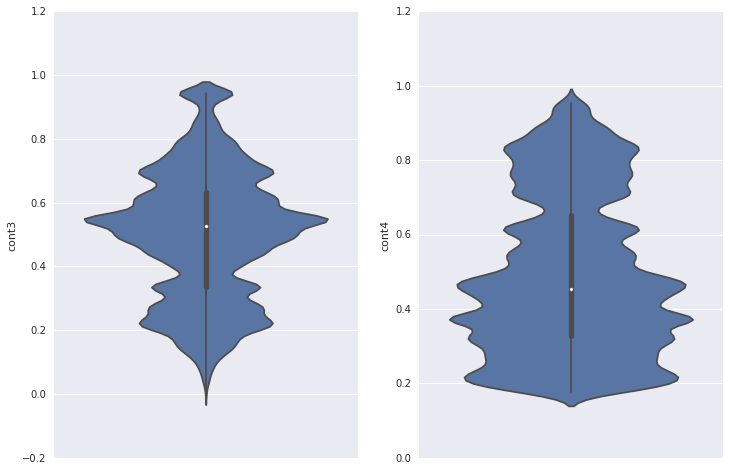

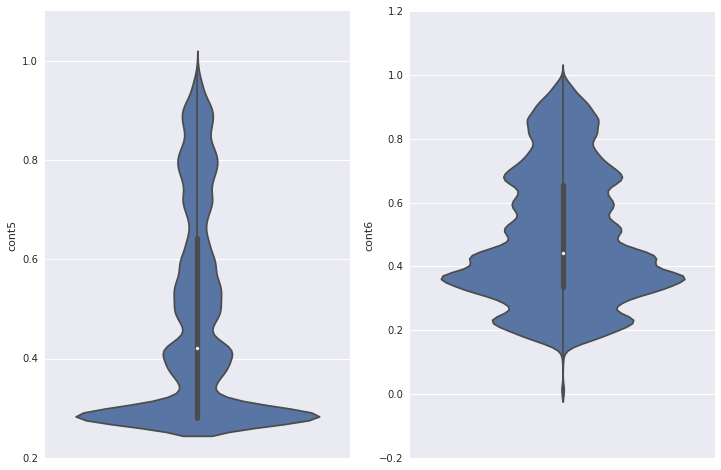

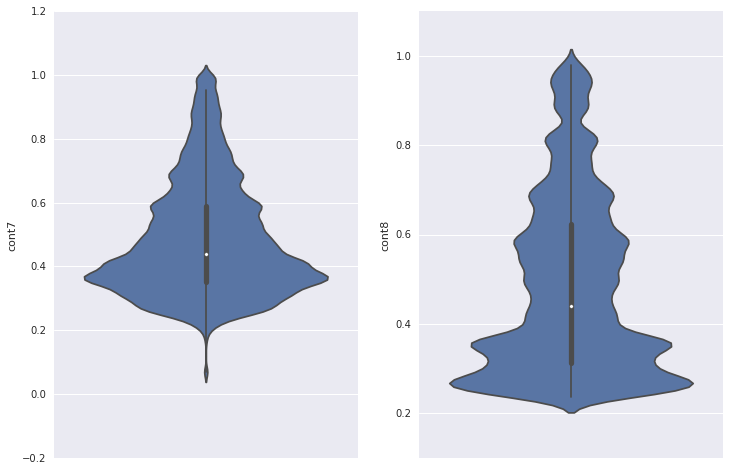

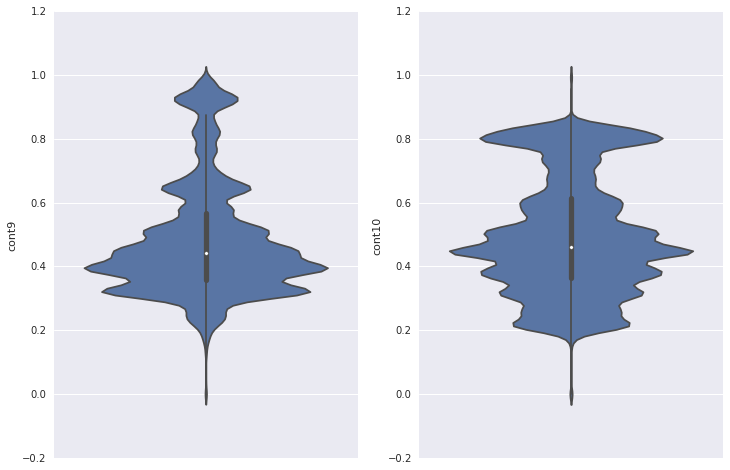

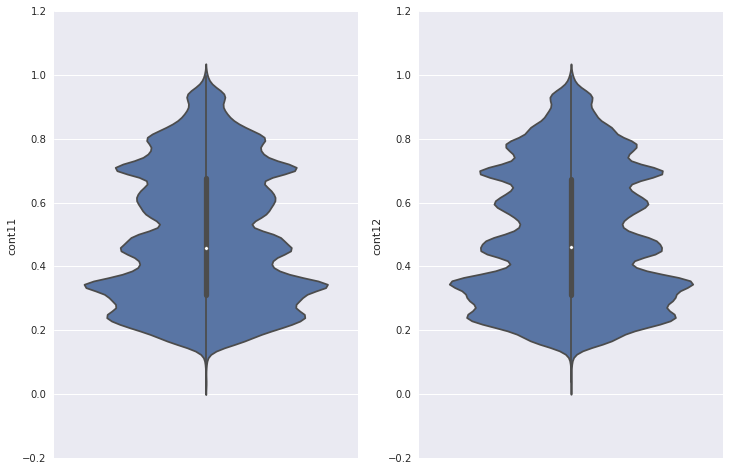

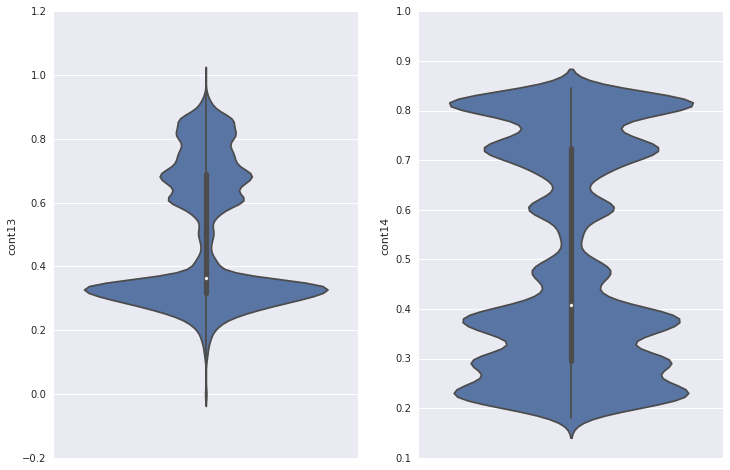

In [5]:
# We will visualize all the continuous attributes using Violin Plot - a combination of box and density plots

import numpy

#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

#range of features considered
split = 116 

#number of features considered
size = 15

#create a dataframe with only continuous features
data=dataset.iloc[:,split:] 

#get the names of all the columns
cols=data.columns 

#Plot violin for all attributes in a 7x2 grid
n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=dataset, ax=ax[j])


#cont1 has many values close to 0.5
#cont2 has a pattern where there a several spikes at specific points
#cont5 has many values near 0.3
#cont14 has a distinct pattern. 0.22 and 0.82 have a lot of concentration
#loss distribution must be converted to normal

## Data Transformation
* Skew correction

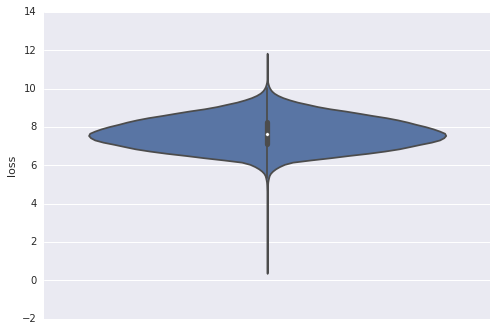

In [6]:
#log1p function applies log(1+x) to all elements of the column
dataset["loss"] = numpy.log1p(dataset["loss"])
#visualize the transformed column
sns.violinplot(data=dataset,y="loss")  
plt.show()

#Plot shows that skew is corrected to a large extent

## Data Interaction
* Correlation

In [7]:
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore categorical data

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


## Data Interaction
* Scatter plot

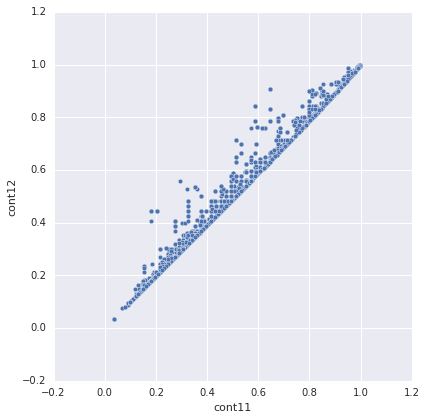

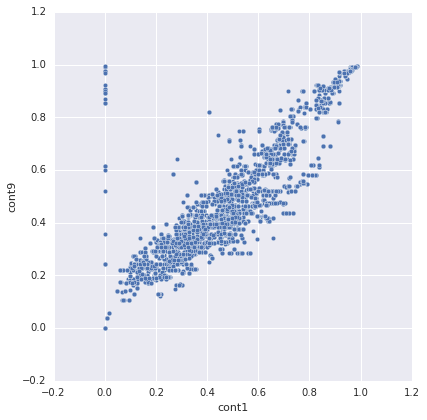

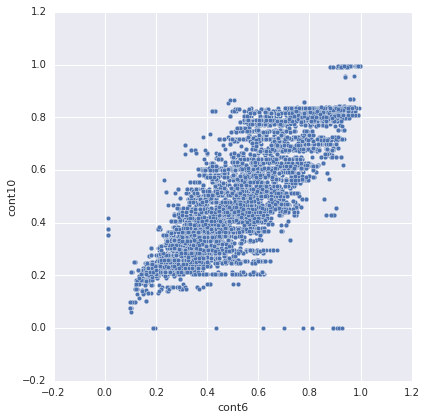

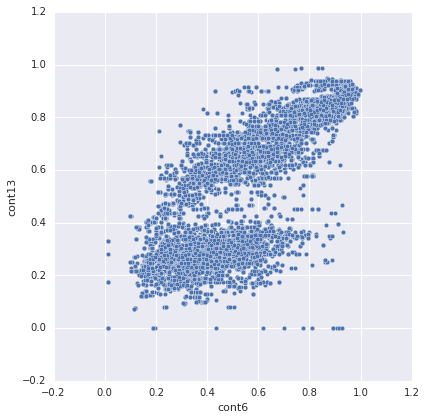

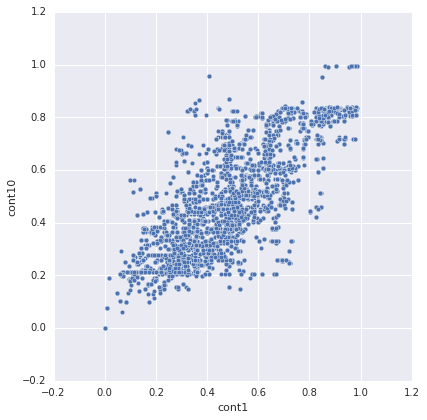

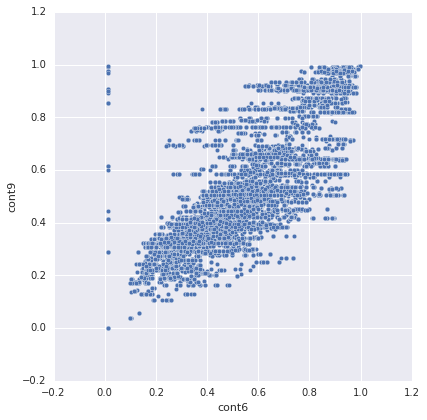

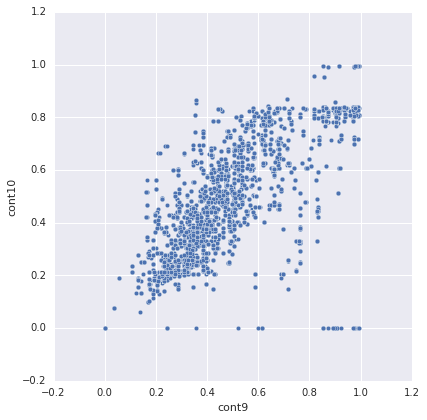

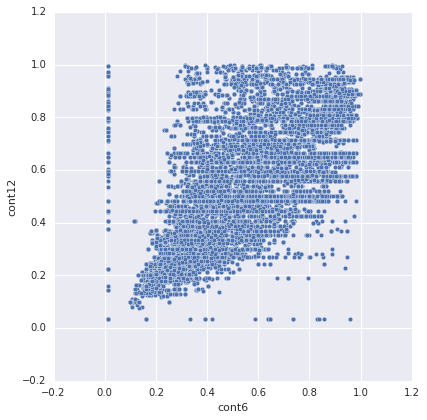

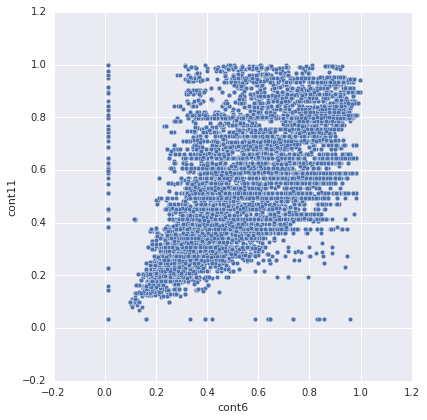

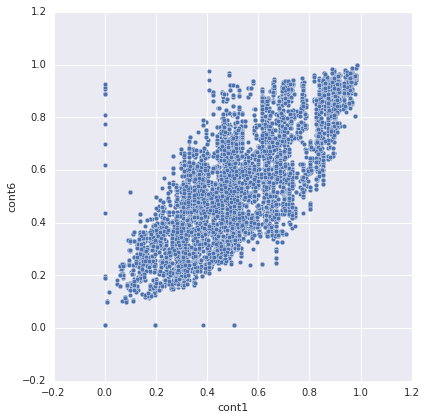

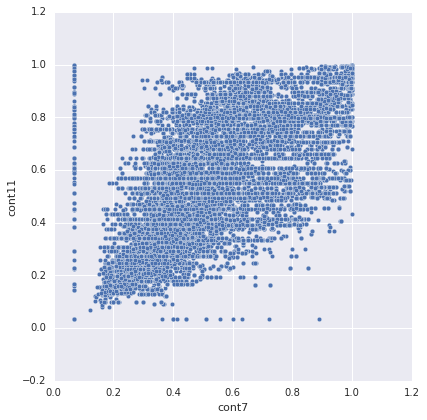

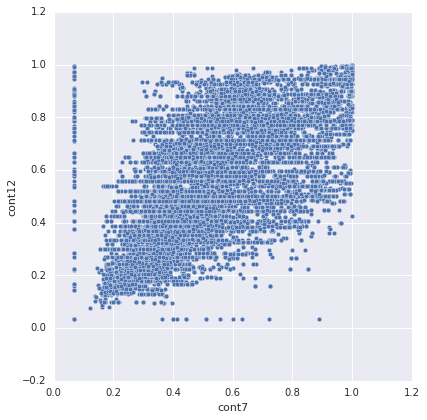

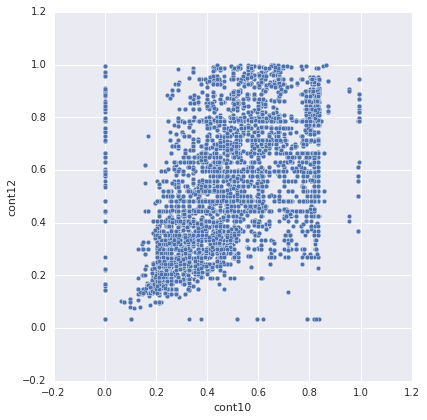

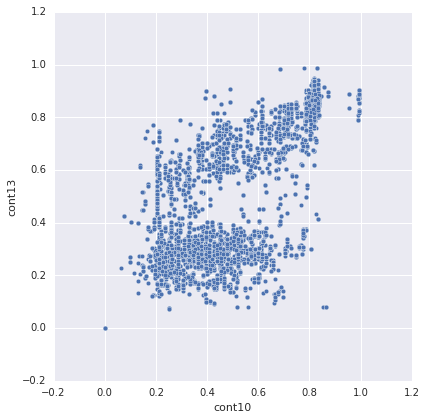

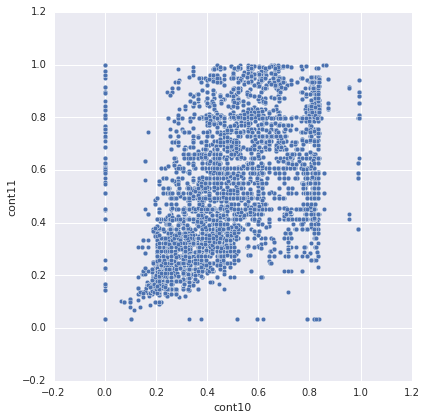

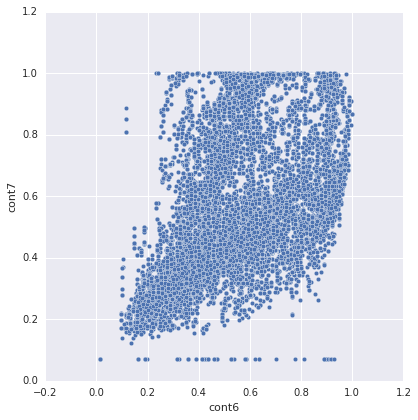

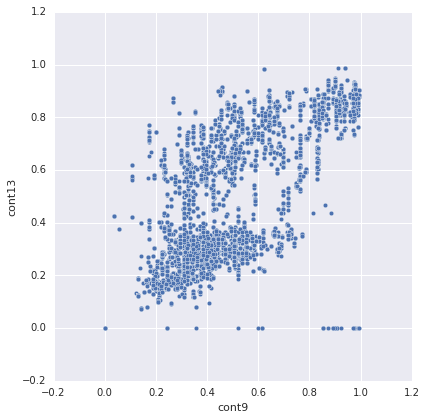

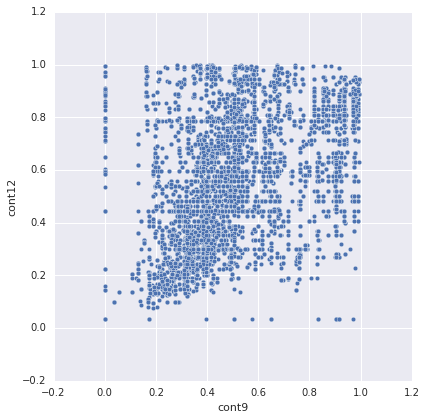

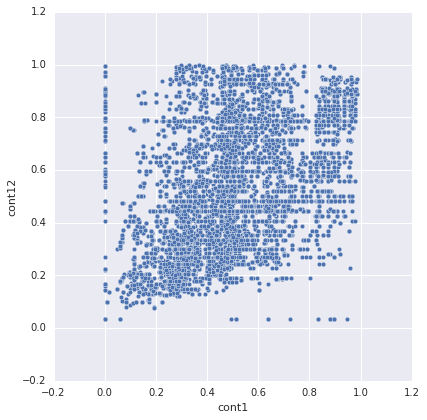

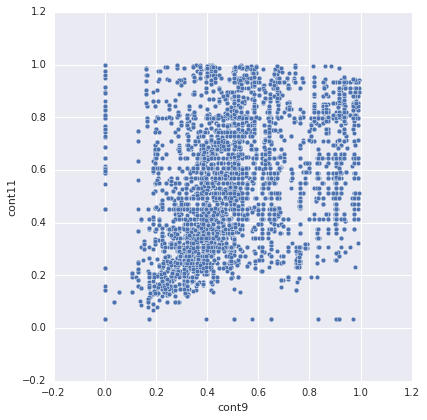

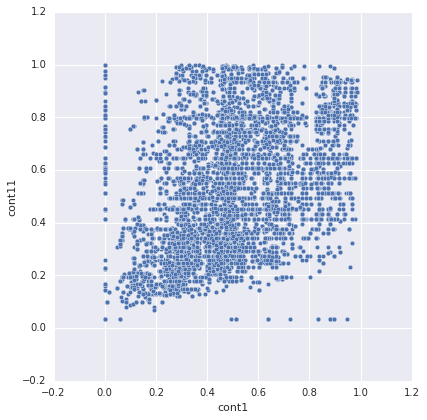

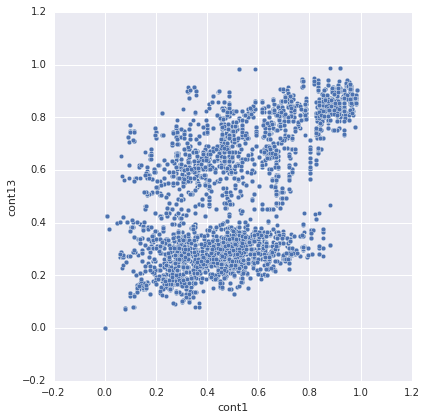

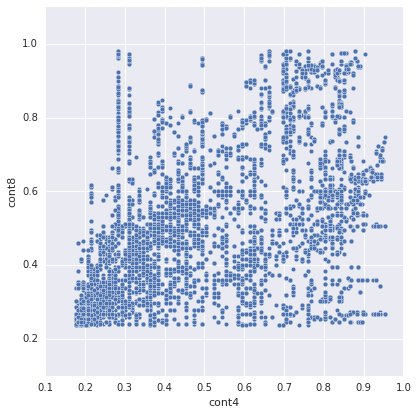

In [8]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(dataset, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

#cont11 and cont12 give an almost linear pattern...one must be removed
#cont1 and cont9 are highly correlated ...either of them could be safely removed 
#cont6 and cont10 show very good correlation too

## Data Visualization
* Categorical attributes

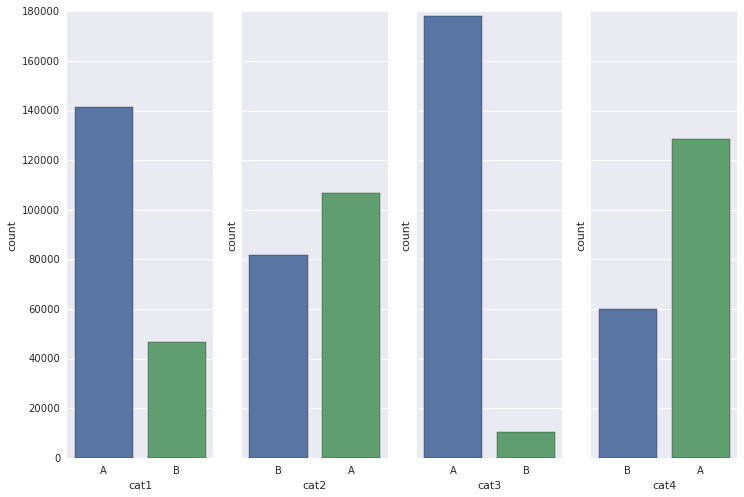

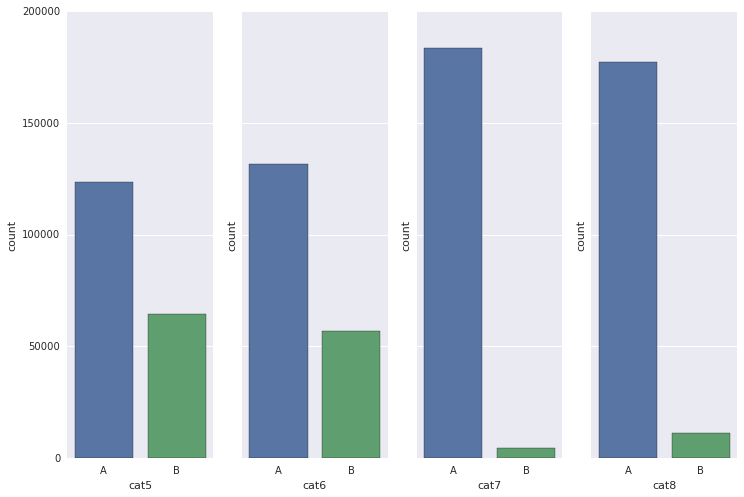

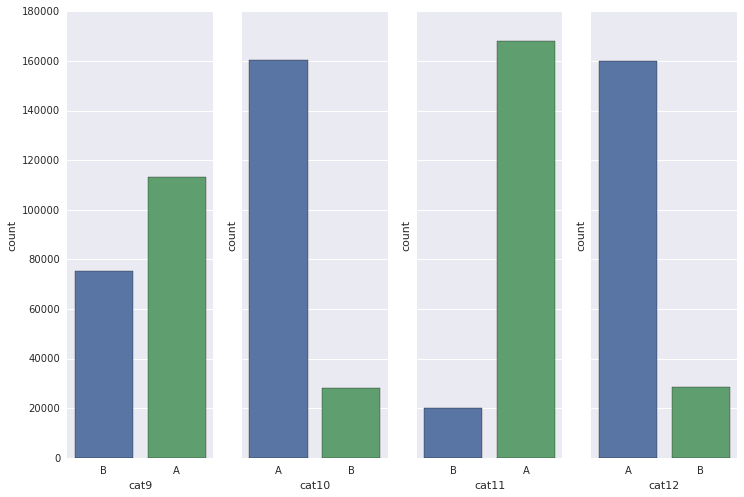

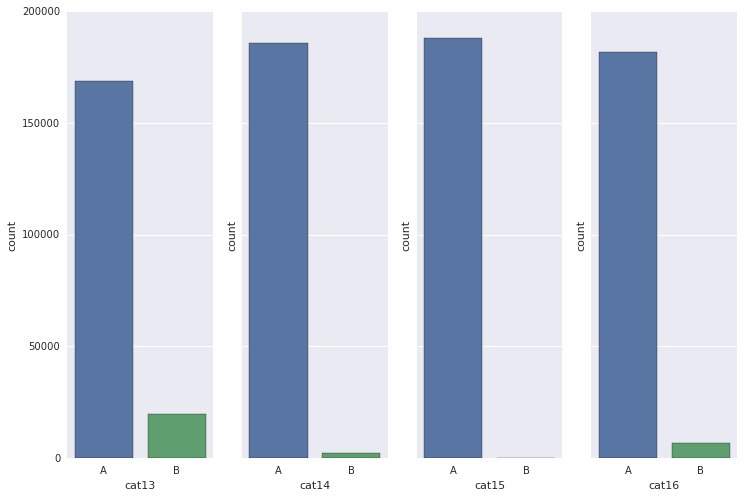

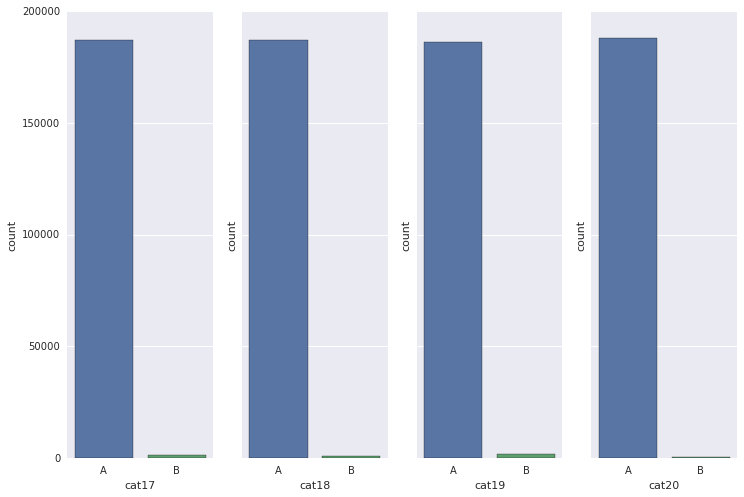

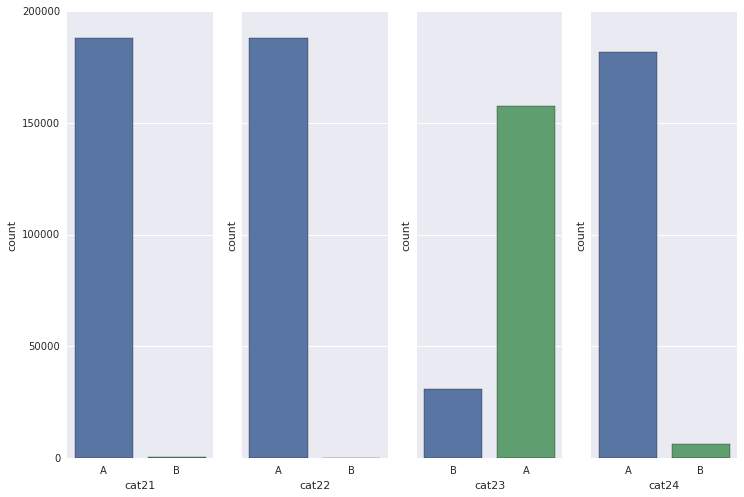

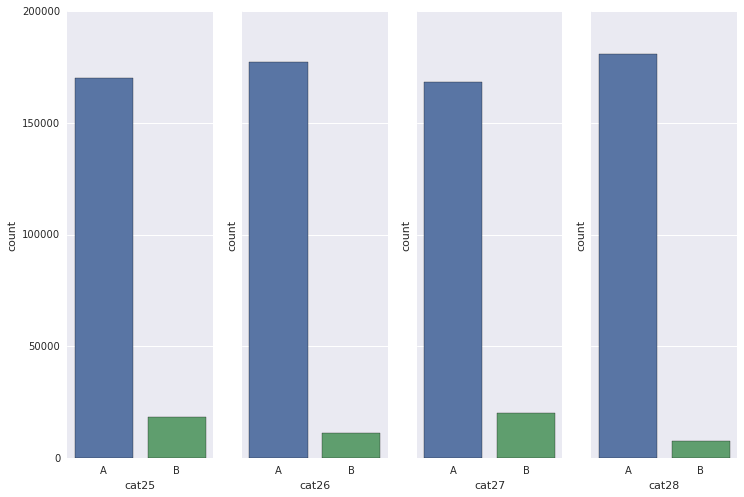

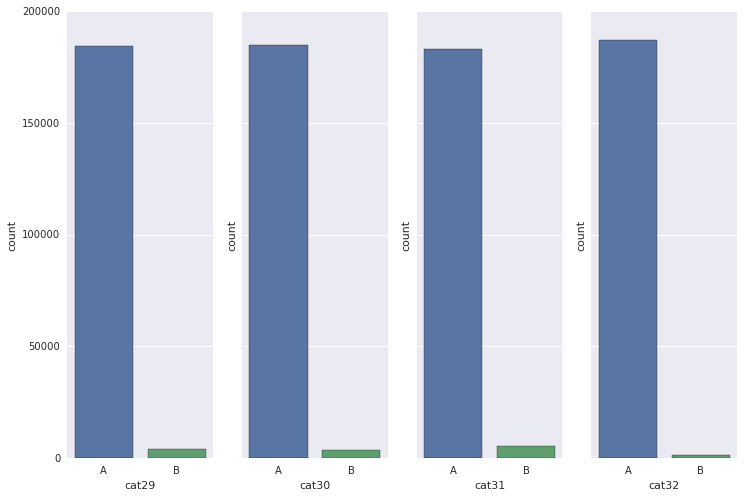

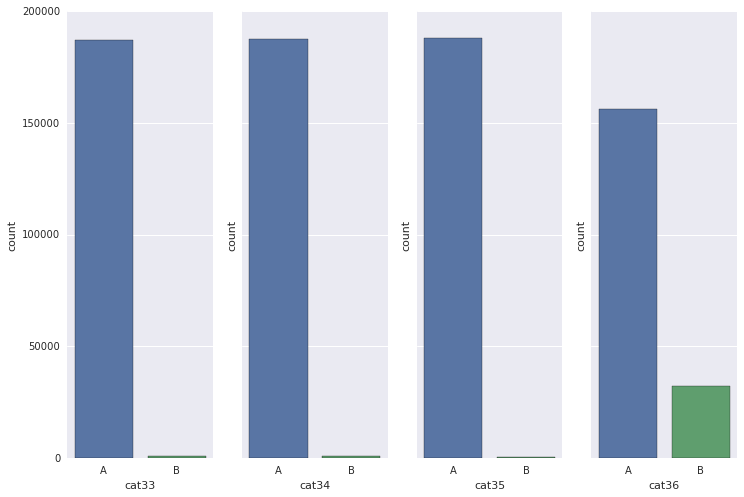

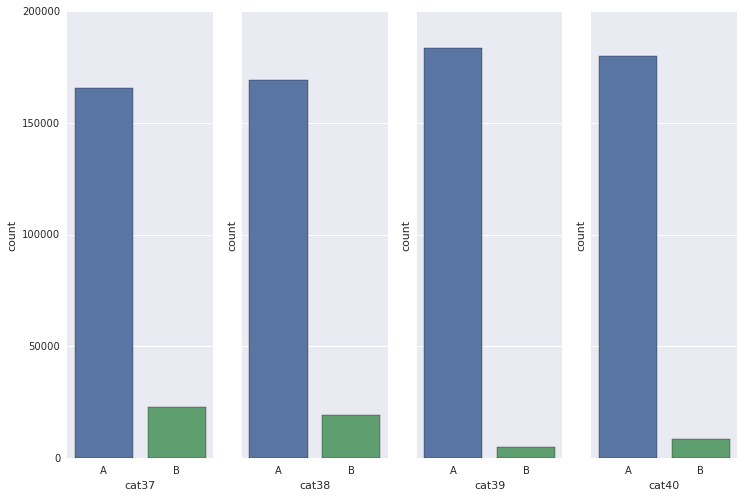

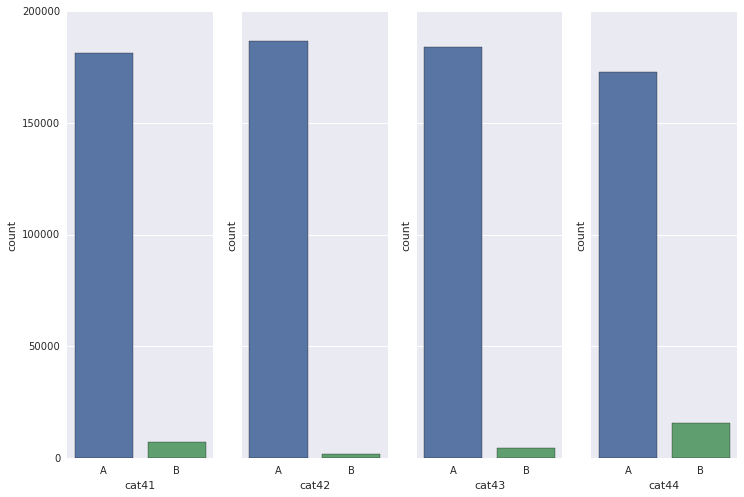

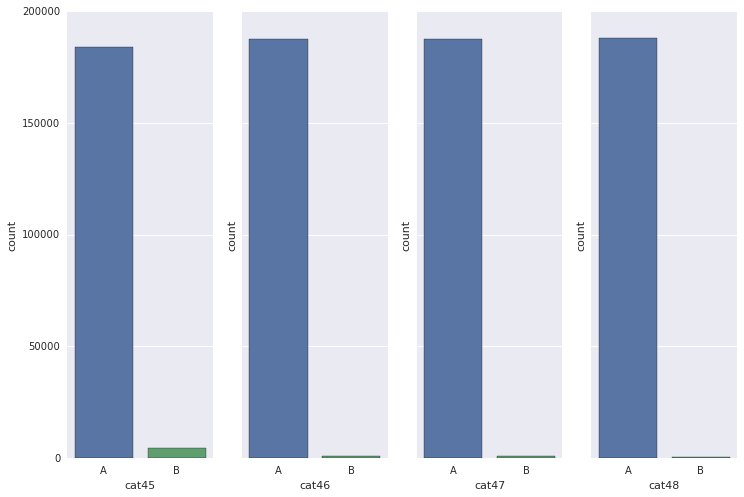

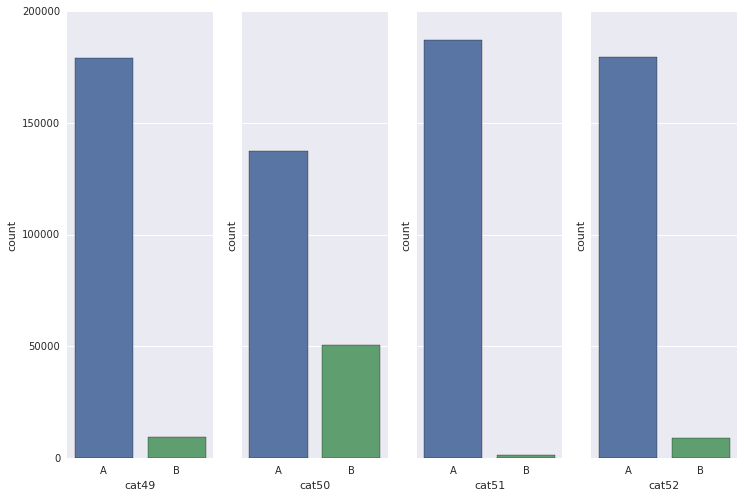

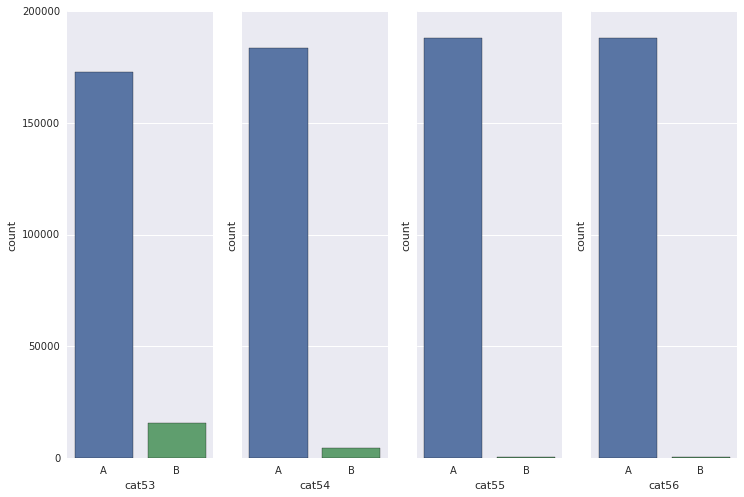

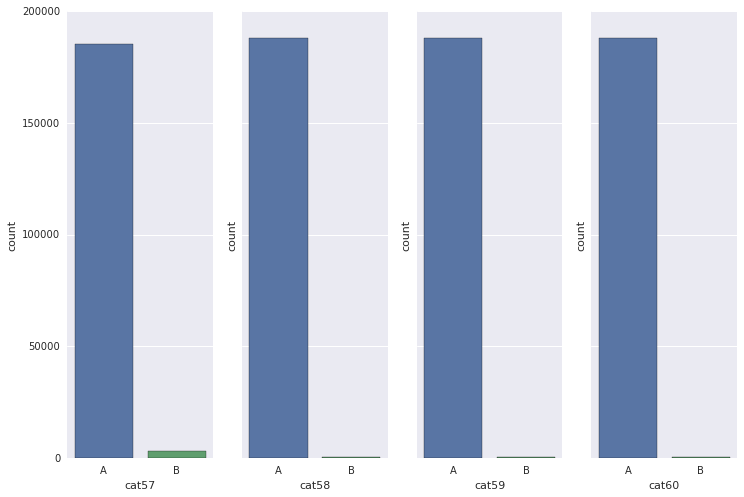

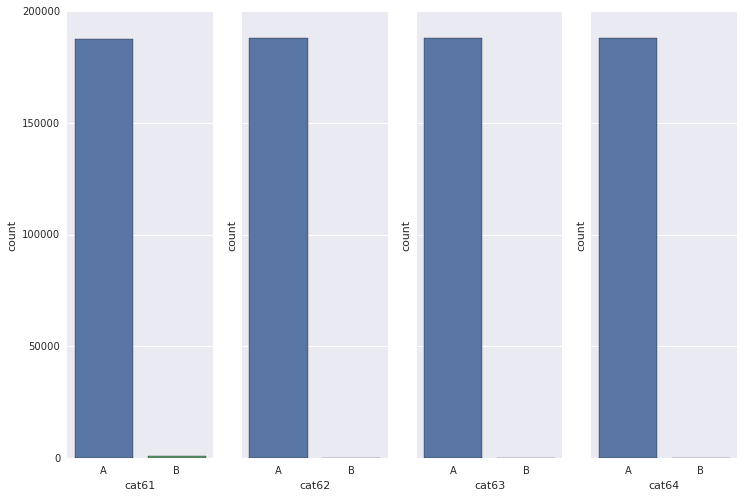

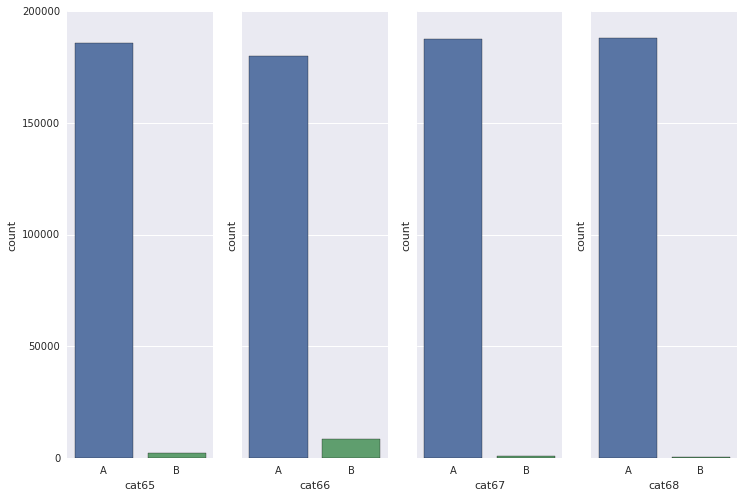

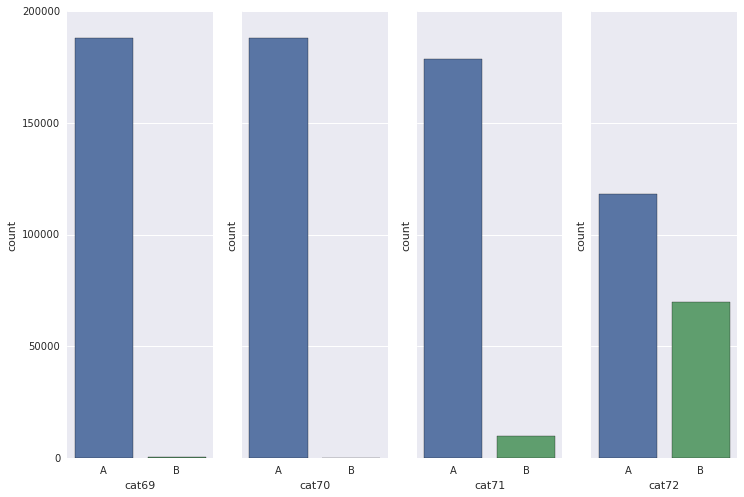

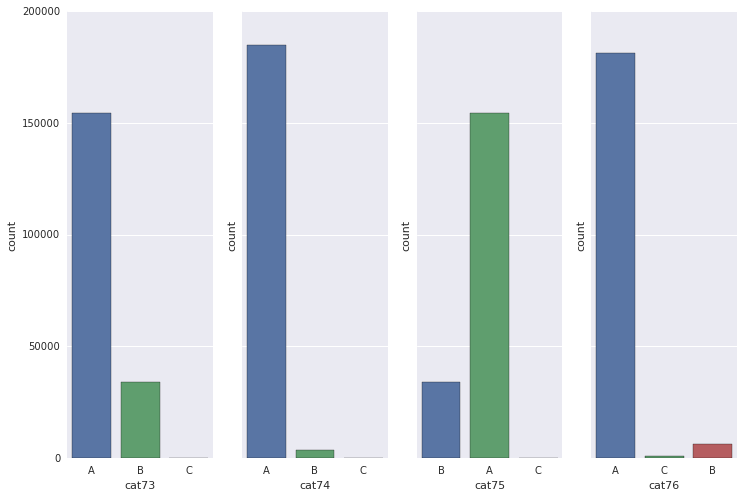

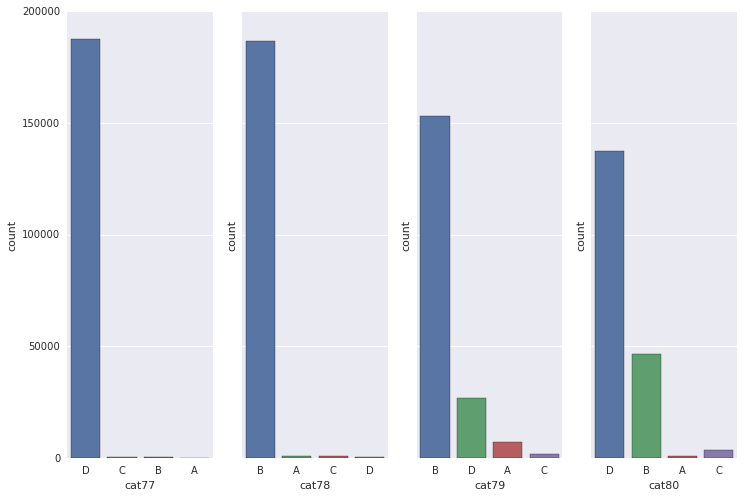

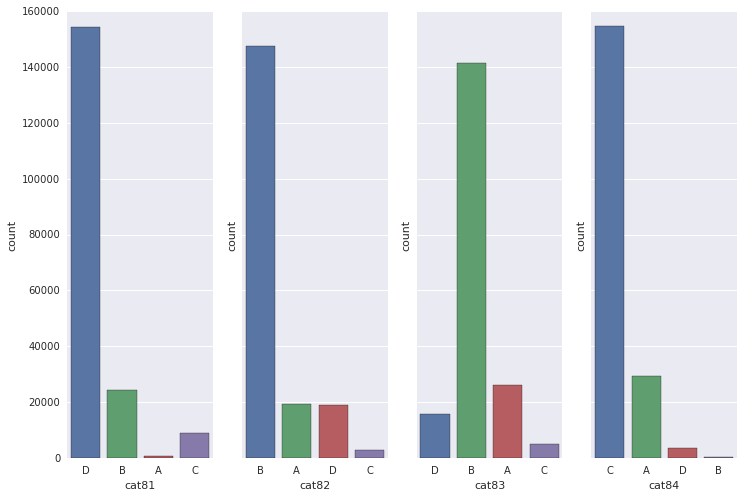

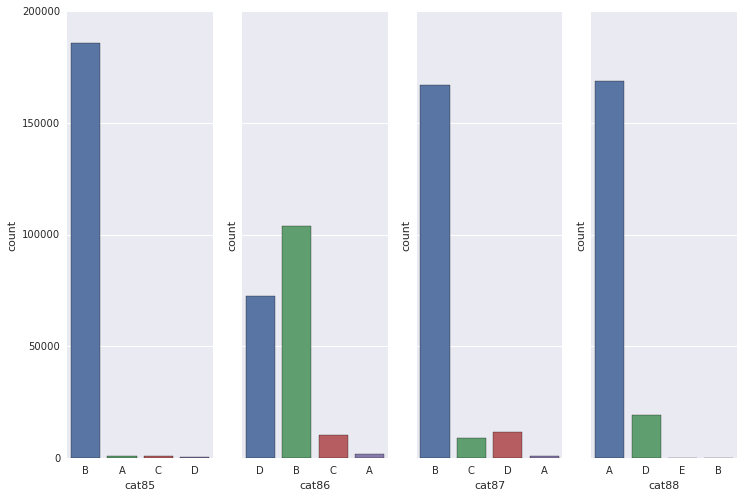

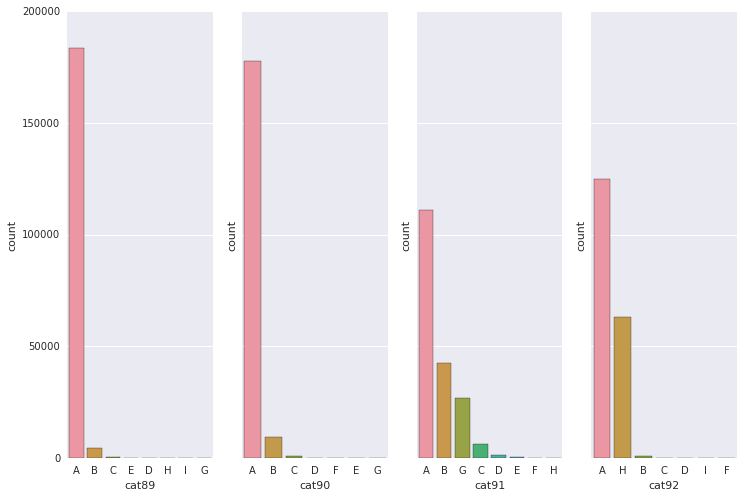

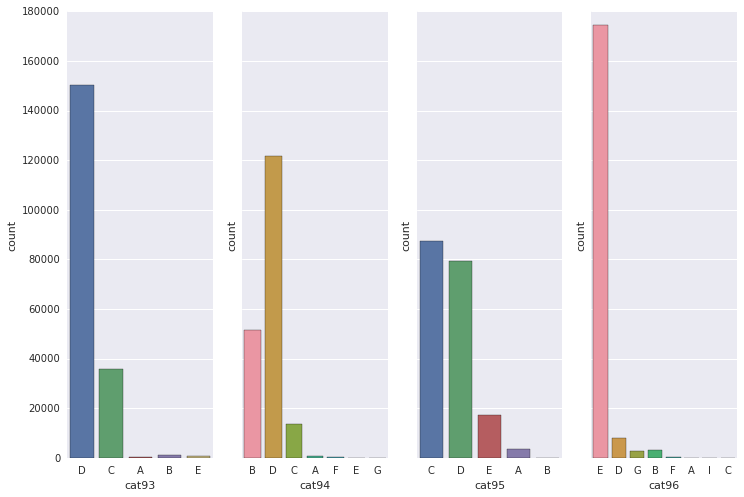

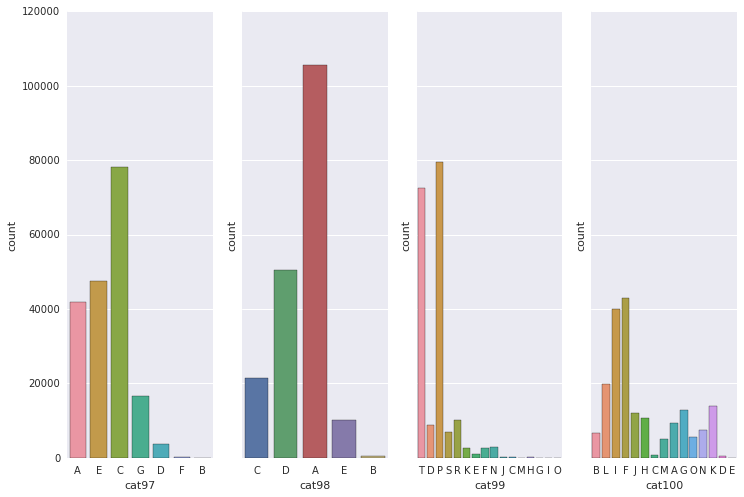

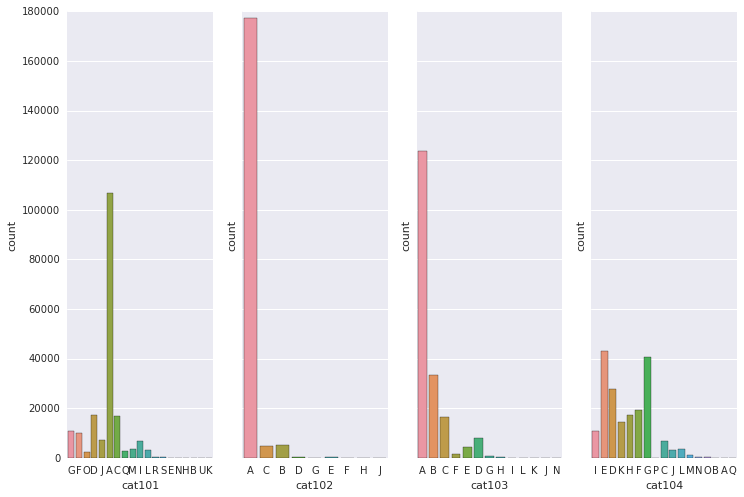

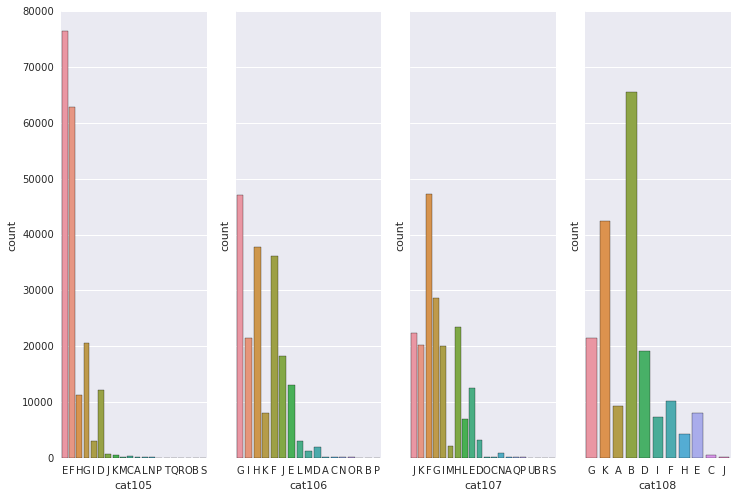

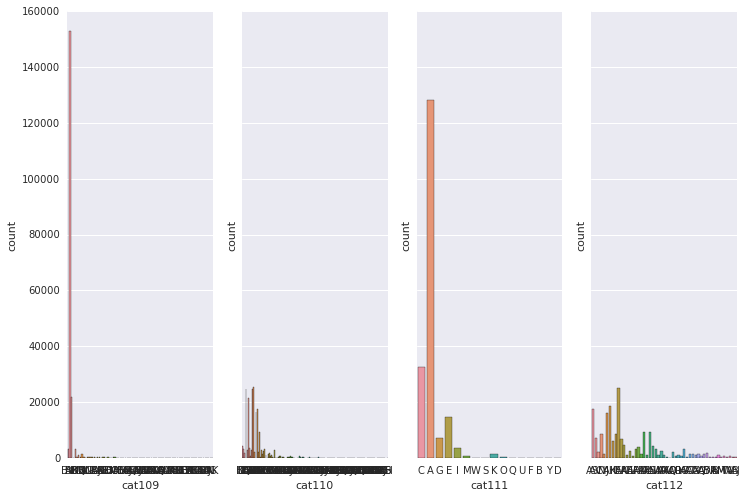

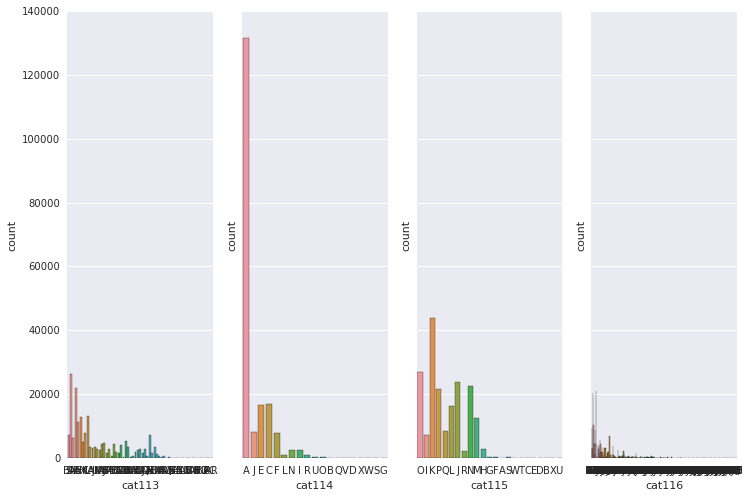

In [9]:
# Count of each label in each category

#names of all the columns
cols = dataset.columns

#Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=dataset, ax=ax[j])

#cat1 to cat72 have only two labels A and B. In most of the cases, B has very few entries
#cat73 to cat 108 have more than two labels
#cat109 to cat116 have many labels

##Data Preparation
* One Hot Encoding of categorical data

In [10]:
import pandas

#cat1 to cat116 have strings. The ML algorithms we are going to study require numberical data
#One-hot encoding converts an attribute to a binary vector

#Variable to hold the list of variables for an attribute in the train and test data
labels = []

for i in range(0,split):
    train = dataset[cols[i]].unique()
    test = dataset_test[cols[i]].unique()
    labels.append(list(set(train) | set(test)))    

del dataset_test

#Import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset.iloc[:,i])
    feature = feature.reshape(dataset.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

# Make a 2D array from a list of 1D arrays
encoded_cats = numpy.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats.shape)

#Concatenate encoded attributes with continuous attributes
dataset_encoded = numpy.concatenate((encoded_cats,dataset.iloc[:,split:].values),axis=1)
del cats
del feature
del dataset
del encoded_cats
print(dataset_encoded.shape)

(188318, 1176)
(188318, 1191)


##Data Preparation
* Split into train and validation

In [11]:
#get the number of rows and columns
r, c = dataset_encoded.shape

#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)

#Y is the target column, X has the rest
X = dataset_encoded[:,0:(c-1)]
Y = dataset_encoded[:,(c-1)]
del dataset_encoded

#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#Split the data into chunks
from sklearn import cross_validation
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)
del X
del Y

#All features
X_all = []

#List of combinations
comb = []

#Dictionary to store the MAE for all algorithms 
mae = []

#Scoring parameter
from sklearn.metrics import mean_absolute_error

#Add this version of X to the list 
n = "All"
#X_all.append([n, X_train,X_val,i_cols])
X_all.append([n, i_cols])

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Evaluation, prediction, and analysis
* Linear Regression (Linear algo)

In [12]:
#Evaluation of various combinations of LinearRegression

#Import the library
from sklearn.linear_model import LinearRegression

#uncomment the below lines if you want to run the algo
##Set the base model
#model = LinearRegression(n_jobs=-1)
#algo = "LR"
#
##Accuracy of the model using all features
#for name,i_cols_list in X_all:
#    model.fit(X_train[:,i_cols_list],Y_train)
#    result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
#    mae.append(result)
#    print(name + " %s" % result)
#comb.append(algo)

#Result obtained after running the algo. Comment the below two lines if you want to run the algo
mae.append(1278)
comb.append("LR" )    

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#MAE achieved is 1278

## Evaluation, prediction, and analysis
* Ridge Regression (Linear algo)

In [13]:
#Evaluation of various combinations of Ridge LinearRegression

#Import the library
from sklearn.linear_model import Ridge

#Add the alpha value to the below list if you want to run the algo
a_list = numpy.array([])

for alpha in a_list:
    #Set the base model
    model = Ridge(alpha=alpha,random_state=seed)
    
    algo = "Ridge"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % alpha )

#Result obtained by running the algo for alpha=1.0    
if (len(a_list)==0):
    mae.append(1267.5)
    comb.append("Ridge" + " %s" % 1.0 )    
    
##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is 1267 with alpha=1

## Evaluation, prediction, and analysis
* LASSO Linear Regression (Linear algo)

In [14]:
#Evaluation of various combinations of Lasso LinearRegression

#Import the library
from sklearn.linear_model import Lasso

#Add the alpha value to the below list if you want to run the algo
a_list = numpy.array([])

for alpha in a_list:
    #Set the base model
    model = Lasso(alpha=alpha,random_state=seed)
    
    algo = "Lasso"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % alpha )

#Result obtained by running the algo for alpha=0.001    
if (len(a_list)==0):
    mae.append(1262.5)
    comb.append("Lasso" + " %s" % 0.001 )
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#High computation time
#Best estimated performance is 1262.5 for alpha = 0.001

## Evaluation, prediction, and analysis
* Elastic Net Regression (Linear algo)

In [15]:
#Evaluation of various combinations of ElasticNet LinearRegression

#Import the library
from sklearn.linear_model import ElasticNet

#Add the alpha value to the below list if you want to run the algo
a_list = numpy.array([])

for alpha in a_list:
    #Set the base model
    model = ElasticNet(alpha=alpha,random_state=seed)
    
    algo = "Elastic"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % alpha )

if (len(a_list)==0):
    mae.append(1260)
    comb.append("Elastic" + " %s" % 0.001 )
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#High computation time
#Best estimated performance is 1260 for alpha = 0.001

## Evaluation, prediction, and analysis
* KNN (non-linear algo)

In [16]:
#Evaluation of various combinations of KNN

#Import the library
from sklearn.neighbors import KNeighborsRegressor

#Add the N value to the below list if you want to run the algo
n_list = numpy.array([])

for n_neighbors in n_list:
    #Set the base model
    model = KNeighborsRegressor(n_neighbors=n_neighbors,n_jobs=-1)
    
    algo = "KNN"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_neighbors )

if (len(n_list)==0):
    mae.append(1745)
    comb.append("KNN" + " %s" % 1 )
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#Very high computation time
#Best estimated performance is 1745 for n=1

## Evaluation, prediction, and analysis
* CART (non-linear algo)

In [17]:
#Evaluation of various combinations of CART

#Import the library
from sklearn.tree import DecisionTreeRegressor

#Add the max_depth value to the below list if you want to run the algo
d_list = numpy.array([])

for max_depth in d_list:
    #Set the base model
    model = DecisionTreeRegressor(max_depth=max_depth,random_state=seed)
    
    algo = "CART"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % max_depth )

if (len(a_list)==0):
    mae.append(1741)
    comb.append("CART" + " %s" % 5 )    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#High computation time
#Best estimated performance is 1741 for depth=5

## Evaluation, prediction, and analysis
* SVM (Non-linear algo)

In [18]:
#Evaluation of various combinations of SVM

#Import the library
from sklearn.svm import SVR

#Add the C value to the below list if you want to run the algo
c_list = numpy.array([])

for C in c_list:
    #Set the base model
    model = SVR(C=C)
    
    algo = "SVM"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % C )

##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#very very high computation time

## Evaluation, prediction, and analysis
* Bagged Decision Trees (Bagging)

In [19]:
#Evaluation of various combinations of Bagged Decision Trees

#Import the library
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = numpy.array([])

for n_estimators in n_list:
    #Set the base model
    model = BaggingRegressor(n_jobs=-1,n_estimators=n_estimators)
    
    algo = "Bag"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )

##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#very high computation time

## Evaluation, prediction, and analysis
* Random Forest (Bagging)

In [20]:
#Evaluation of various combinations of RandomForest

#Import the library
from sklearn.ensemble import RandomForestRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = numpy.array([])

for n_estimators in n_list:
    #Set the base model
    model = RandomForestRegressor(n_jobs=-1,n_estimators=n_estimators,random_state=seed)
    
    algo = "RF"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )

if (len(n_list)==0):
    mae.append(1213)
    comb.append("RF" + " %s" % 50 )    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is 1213 when the number of estimators is 50

## Evaluation, prediction, and analysis
* Extra Trees (Bagging)

In [21]:
#Evaluation of various combinations of ExtraTrees

#Import the library
from sklearn.ensemble import ExtraTreesRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = numpy.array([])

for n_estimators in n_list:
    #Set the base model
    model = ExtraTreesRegressor(n_jobs=-1,n_estimators=n_estimators,random_state=seed)
    
    algo = "ET"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )

if (len(n_list)==0):
    mae.append(1254)
    comb.append("ET" + " %s" % 100 )    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is 1254 for 100 estimators

## Evaluation, prediction, and analysis
* AdaBoost (Boosting)

In [22]:
#Evaluation of various combinations of AdaBoost

#Import the library
from sklearn.ensemble import AdaBoostRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = numpy.array([])

for n_estimators in n_list:
    #Set the base model
    model = AdaBoostRegressor(n_estimators=n_estimators,random_state=seed)
    
    algo = "Ada"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )

if (len(n_list)==0):
    mae.append(1678)
    comb.append("Ada" + " %s" % 100 )    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is 1678 with n=100

## Evaluation, prediction, and analysis
* Stochastic Gradient Boosting (Boosting)

In [23]:
#Evaluation of various combinations of SGB

#Import the library
from sklearn.ensemble import GradientBoostingRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = numpy.array([])

for n_estimators in n_list:
    #Set the base model
    model = GradientBoostingRegressor(n_estimators=n_estimators,random_state=seed)
    
    algo = "SGB"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )

if (len(n_list)==0):
    mae.append(1278)
    comb.append("SGB" + " %s" % 50 )    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is ?

## Evaluation, prediction, and analysis
* XGBoost

In [24]:
#Evaluation of various combinations of XGB

#Import the library
from xgboost import XGBRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = numpy.array([])

for n_estimators in n_list:
    #Set the base model
    model = XGBRegressor(n_estimators=n_estimators,seed=seed)
    
    algo = "XGB"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )

if (len(n_list)==0):
    mae.append(1169)
    comb.append("XGB" + " %s" % 1000 )    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is 1169 with n=1000

## Evaluation, prediction, and analysis
* MLP (Deep Learning)

Using TensorFlow backend.


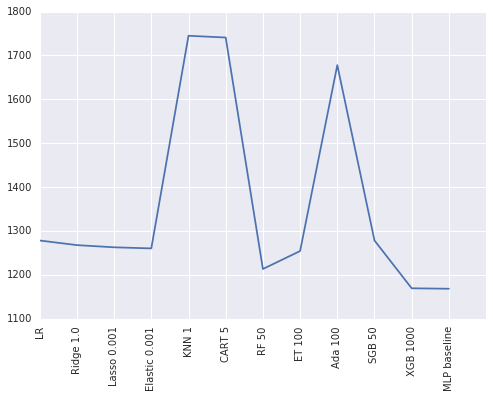

In [25]:
#Evaluation of various combinations of multi-layer perceptrons

#Import libraries for deep learning
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

# define baseline model
def baseline(v):
     # create model
     model = Sequential()
     model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
     model.add(Dense(1, init='normal'))
     # Compile model
     model.compile(loss='mean_absolute_error', optimizer='adam')
     return model

# define smaller model
def smaller(v):
     # create model
     model = Sequential()
     model.add(Dense(v*(c-1)/2, input_dim=v*(c-1), init='normal', activation='relu'))
     model.add(Dense(1, init='normal', activation='relu'))
     # Compile model
     model.compile(loss='mean_absolute_error', optimizer='adam')
     return model

# define deeper model
def deeper(v):
 # create model
 model = Sequential()
 model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
 model.add(Dense(v*(c-1)/2, init='normal', activation='relu'))
 model.add(Dense(1, init='normal', activation='relu'))
 # Compile model
 model.compile(loss='mean_absolute_error', optimizer='adam')
 return model

# Optimize using dropout and decay
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm

def dropout(v):
    #create model
    model = Sequential()
    model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu',W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(v*(c-1)/2, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, init='normal', activation='relu'))
    # Compile model
    sgd = SGD(lr=0.1,momentum=0.9,decay=0.0,nesterov=False)
    model.compile(loss='mean_absolute_error', optimizer=sgd)
    return model

# define decay model
def decay(v):
    # create model
    model = Sequential()
    model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
    model.add(Dense(1, init='normal', activation='relu'))
    # Compile model
    sgd = SGD(lr=0.1,momentum=0.8,decay=0.01,nesterov=False)
    model.compile(loss='mean_absolute_error', optimizer=sgd)
    return model

est_list = []
#uncomment the below if you want to run the algo
#est_list = [('MLP',baseline),('smaller',smaller),('deeper',deeper),('dropout',dropout),('decay',decay)]

for name, est in est_list:
 
    algo = name

    #Accuracy of the model using all features
    for m,i_cols_list in X_all:
        model = KerasRegressor(build_fn=est, v=1, nb_epoch=10, verbose=0)
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo )

if (len(est_list)==0):
    mae.append(1168)
    comb.append("MLP" + " baseline" )    
    
##Set figure size
#plt.rc("figure", figsize=(25, 10))

#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    

#Best estimated performance is MLP=1168

## Make Predictions

In [26]:
# Make predictions using XGB as it gave the best estimated performance        

X = numpy.concatenate((X_train,X_val),axis=0)
del X_train
del X_val
Y = numpy.concatenate((Y_train,Y_val),axis=0)
del Y_train
del Y_val

n_estimators = 1000

#Best model definition
best_model = XGBRegressor(n_estimators=n_estimators,seed=seed)
best_model.fit(X,Y)
del X
del Y
#Read test dataset
dataset_test = pandas.read_csv("../input/test.csv")
#Drop unnecessary columns
ID = dataset_test['id']
dataset_test.drop('id',axis=1,inplace=True)

#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset_test.iloc[:,i])
    feature = feature.reshape(dataset_test.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

# Make a 2D array from a list of 1D arrays
encoded_cats = numpy.column_stack(cats)

del cats

#Concatenate encoded attributes with continuous attributes
X_test = numpy.concatenate((encoded_cats,dataset_test.iloc[:,split:].values),axis=1)

del encoded_cats
del dataset_test

#Make predictions using the best model
predictions = numpy.expm1(best_model.predict(X_test))
del X_test
# Write submissions to output file in the correct format
with open("submission.csv", "w") as subfile:
    subfile.write("id,loss\n")
    for i, pred in enumerate(list(predictions)):
        subfile.write("%s,%s\n"%(ID[i],pred))